In [1]:
# -*- coding: utf-8 -*-
"""
@author: lrhao
@software: jupyter
@file: baseline.ipynb
@time: 2020-12-11
@description：
"""
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submit = pd.read_csv('../data/submit.csv')
train.shape, test.shape, submit.shape

((40000, 21), (15000, 20), (15000, 2))

In [3]:
train.head()

,id,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,...,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL,label
0,train_0,1,1038672000,90,90,999,0,99,150,12,...,1,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708,0
1,train_1,2,504892800,90,90,999,0,99,110,0,...,1,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979,0
2,train_2,1,736185600,90,90,999,0,99,150,9,...,1,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708,0
3,train_3,1,428515200,90,90,999,0,99,150,7,...,1,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708,0
4,train_4,2,544204800,90,90,999,0,99,900,14,...,1,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708,0


In [4]:
cate_2_cols = ['XINGBIE', 'ZHIWU', 'XUELI']
cate_cols = ['HYZK', 'ZHIYE', 'ZHICHEN', 'DWJJLX', 'DWSSHY', 'GRZHZT']
train[cate_cols]

,HYZK,ZHIYE,ZHICHEN,DWJJLX,DWSSHY,GRZHZT
0,90,90,999,150,12,1
1,90,90,999,110,0,1
2,90,90,999,150,9,1
3,90,90,999,150,7,1
4,90,90,999,900,14,1
...,...,...,...,...,...,...
39995,90,90,999,110,16,1
39996,90,90,999,110,14,1
39997,90,90,999,143,9,1
39998,90,90,999,150,6,1


In [5]:
num_cols = ['GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DWYJCE','DKFFE', 'DKYE', 'DKLL']
train[num_cols]

,GRJCJS,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL
0,1737.0,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708
1,4894.0,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979
2,10297.0,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708
3,10071.5,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708
4,2007.0,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708
...,...,...,...,...,...,...,...,...,...
39995,3185.0,82865.575,65304.370,4026.600,590.76,590.76,150237,117816.680,2.708
39996,1660.5,32811.585,27065.150,1603.560,407.82,407.82,300237,267615.065,2.979
39997,3923.0,8875.695,1309.890,3185.800,605.60,605.60,175237,237.000,2.708
39998,3527.0,2079.400,252.875,1614.490,467.30,467.30,125237,113068.900,2.708


特征工程

In [6]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [7]:
df['missing_rate'] = (df.shape[1] - df.count(axis = 1)) / df.shape[1]

df['DKFFE_DKYE'] = df['DKFFE'] + df['DKYE']
df['DKFFE_DKY_multi_DKLL'] = (df['DKFFE'] + df['DKYE']) * df['DKLL']
df['DKFFE_multi_DKLL'] = df['DKFFE'] * df['DKLL']
df['DKYE_multi_DKLL'] = df['DKYE'] * df['DKLL']
df['GRYJCE_DWYJCE'] = df['GRYJCE'] + df['DWYJCE']
df['GRZHDNGJYE_GRZHSNJZYE'] = df['GRZHDNGJYE'] + df['GRZHSNJZYE']

df['DKFFE_multi_DKLL_ratio'] = df['DKFFE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']
df['DKYE_multi_DKLL_ratio'] = df['DKYE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']
df['DKYE_DKFFE_ratio'] = df['DKYE'] / df['DKFFE_DKYE']
df['DKFFE_DKYE_ratio'] = df['DKFFE'] / df['DKFFE_DKYE']
df['GRZHYE_diff_GRZHDNGJYE'] = df['GRZHYE'] - df['GRZHDNGJYE']
df['GRZHYE_diff_GRZHSNJZYE'] = df['GRZHYE'] - df['GRZHSNJZYE']
df['GRYJCE_DWYJCE_ratio'] = df['GRYJCE'] / df['GRYJCE_DWYJCE']
df['DWYJCE_GRYJCE_ratio'] = df['DWYJCE'] / df['GRYJCE_DWYJCE']


gen_feats = ['DKFFE_DKYE', 'DKFFE_DKY_multi_DKLL', 'DKFFE_multi_DKLL', 'DKYE_multi_DKLL', 'GRYJCE_DWYJCE', 
             'GRZHDNGJYE_GRZHSNJZYE', 'DKFFE_multi_DKLL_ratio', 'DKYE_multi_DKLL_ratio', 'GRZHYE_diff_GRZHDNGJYE',
            'GRZHYE_diff_GRZHSNJZYE', 'GRYJCE_DWYJCE_ratio', 'DWYJCE_GRYJCE_ratio', 'DKYE_DKFFE_ratio', 'DKFFE_DKYE_ratio']

df.head()

,id,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,...,GRYJCE_DWYJCE,GRZHDNGJYE_GRZHSNJZYE,DKFFE_multi_DKLL_ratio,DKYE_multi_DKLL_ratio,DKYE_DKFFE_ratio,DKFFE_DKYE_ratio,GRZHYE_diff_GRZHDNGJYE,GRZHYE_diff_GRZHSNJZYE,GRYJCE_DWYJCE_ratio,DWYJCE_GRYJCE_ratio
0,train_0,1,1038672000,90,90,999,0,99,150,12,...,624.00,1638.310,0.532069,0.467931,0.467931,0.532069,2386.515,2422.205,0.5,0.5
1,train_1,2,504892800,90,90,999,0,99,110,0,...,1591.68,54278.420,0.501658,0.498342,0.498342,0.501658,16989.995,-35158.025,0.5,0.5
2,train_2,1,736185600,90,90,999,0,99,150,9,...,2888.40,21193.160,0.504869,0.495131,0.495131,0.504869,20196.580,13463.460,0.5,0.5
3,train_3,1,428515200,90,90,999,0,99,150,7,...,2834.28,101972.560,0.538089,0.461911,0.461911,0.538089,109599.835,12169.865,0.5,0.5
4,train_4,2,544204800,90,90,999,0,99,900,14,...,651.00,11064.655,0.508550,0.491450,0.491450,0.508550,201.220,-10791.875,0.5,0.5


<AxesSubplot:xlabel='age', ylabel='Density'>

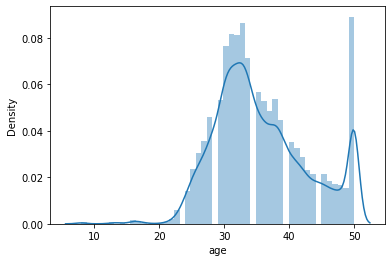

In [8]:
def get_age(df,col = 'age'):
    df[col+"_genFeat1"]=(df['age'] > 18).astype(int)
    df[col+"_genFeat2"]=(df['age'] > 25).astype(int)
    df[col+"_genFeat3"]=(df['age'] > 30).astype(int)
    df[col+"_genFeat4"]=(df['age'] > 35).astype(int)
    df[col+"_genFeat5"]=(df['age'] > 40).astype(int)
    df[col+"_genFeat6"]=(df['age'] > 45).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 7)]

df['age'] = ((1609430399 - df['CSNY']) / (365 * 24 * 3600)).astype(int)
df, genFeats1 = get_age(df, col = 'age')

sns.distplot(df['age'][df['age'] > 0])

<AxesSubplot:xlabel='DKFFE', ylabel='Density'>

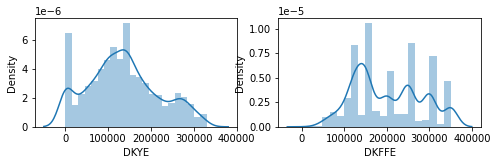

In [9]:
def get_daikuanYE(df,col):
    df[col + '_genFeat1'] = (df[col] > 100000).astype(int)
    df[col + '_genFeat2'] = (df[col] > 120000).astype(int)
    df[col + '_genFeat3'] = (df[col] > 140000).astype(int)
    df[col + '_genFeat4'] = (df[col] > 180000).astype(int)
    df[col + '_genFeat5'] = (df[col] > 220000).astype(int)
    df[col + '_genFeat6'] = (df[col] > 260000).astype(int)
    df[col + '_genFeat7'] = (df[col] > 300000).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 8)]

df, genFeats2 = get_daikuanYE(df, col = 'DKYE')
df, genFeats3 = get_daikuanYE(df, col = 'DKFFE')


plt.figure(figsize = (8, 2))
plt.subplot(1,2,1)
sns.distplot(df['DKYE'][df['label'] == 1])
plt.subplot(1,2,2)
sns.distplot(df['DKFFE'][df['label'] == 1])

In [10]:
for f in tqdm(cate_cols):
    df[f] = df[f].map(dict(zip(df[f].unique(), range(df[f].nunique()))))
    df[f + '_count'] = df[f].map(df[f].value_counts())
    df = pd.concat([df,pd.get_dummies(df[f],prefix=f"{f}")],axis=1)
    
    
cate_cols_combine = [[cate_cols[i], cate_cols[j]] for i in range(len(cate_cols)) \
                     for j in range(i + 1, len(cate_cols))]


for f1, f2 in tqdm(cate_cols_combine):
    df['{}_{}_count'.format(f1, f2)] = df.groupby([f1, f2])['id'].transform('count')
    df['{}_in_{}_prop'.format(f1, f2)] = df['{}_{}_count'.format(f1, f2)] / df[f2 + '_count']
    df['{}_in_{}_prop'.format(f2, f1)] = df['{}_{}_count'.format(f1, f2)] / df[f1 + '_count']

    
for f1 in tqdm(cate_cols):
    g = df.groupby(f1)
    for f2 in num_cols + gen_feats:
        for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)
    for f3 in genFeats2 + genFeats3:
        for stat in ['sum', 'mean']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

num_cols_gen_feats = num_cols + gen_feats
for f1 in tqdm(num_cols_gen_feats):
    g = df.groupby(f1)
    for f2 in num_cols_gen_feats:
        if f1 != f2:
            for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
                df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

for i in tqdm(range(len(num_cols_gen_feats))):
    for j in range(i + 1, len(num_cols_gen_feats)):
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_add'] = df[num_cols_gen_feats[i]] + df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_diff'] = df[num_cols_gen_feats[i]] - df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_multi'] = df[num_cols_gen_feats[i]] * df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_div'] = df[num_cols_gen_feats[i]] / (df[num_cols_gen_feats[j]] + 0.0000000001)
    
            

100%|██████████| 23/23 [00:16<00:00,  1.43it/s]


训练集、测试集

In [11]:
train_df = df[df['label'].isna() == False].reset_index(drop=True)
test_df = df[df['label'].isna() == True].reset_index(drop=True)
display(train_df.shape, test_df.shape)


(40000, 4409)

(15000, 4409)

In [12]:
drop_feats = [f for f in train_df.columns if train_df[f].nunique() == 1 or train_df[f].nunique() == 0]
#len(drop_feats), drop_feats

In [13]:
cols = [col for col in train_df.columns if col not in ['id', 'label'] + drop_feats]

In [14]:
from sklearn.model_selection import StratifiedKFold
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
import time

In [15]:
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    
    return 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

In [16]:
import lightgbm as lgb

oof = np.zeros(train_df.shape[0])
# feat_imp_df = pd.DataFrame({'feat': cols, 'imp': 0})
test_df['prob'] = 0
clf = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=10230,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=723,
    metric=None,
    scale_pos_weight=2
)

val_aucs = []
seeds = [1023, 2048, 2098]
for seed in seeds:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=723)
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['label'])):
        print('--------------------- {} fold ---------------------'.format(i))
        t = time.time()
        #trn_x, trn_y = train_df[cols].iloc[trn_idx].reset_index(drop=True), train_df['label'].values[trn_idx]
        trn = lgb.Dataset(train_df[cols].iloc[trn_idx].reset_index(drop=True), label=train_df['label'].values[trn_idx])
        val_x, val_y = train_df[cols].iloc[val_idx].reset_index(drop=True), train_df['label'].values[val_idx]
        clf.fit(
            trn_x, trn_y,
            eval_set=[(val_x, val_y)],
             categorical_feature=cate_cols,
            eval_metric='auc',
            early_stopping_rounds=200,
            verbose=200
        )
    #     feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
        oof[val_idx] = clf.predict_proba(val_x)[:, 1]
        test_df['prob'] += clf.predict_proba(test_df[cols])[:, 1] / skf.n_splits / len(seeds)       # 使用全部每一个随机种子的每一折预测进行平均
        print('TPR Score %.5f' % tpr_weight_funtion(val_y, oof[val_idx]))

    cv_auc = roc_auc_score(train_df['label'], oof)
    val_aucs.append(cv_auc)
    print('\ncv_auc: ', cv_auc)
print(val_aucs, np.mean(val_aucs))

--------------------- 0 fold ---------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.948022
[400]	valid_0's auc: 0.947819
Early stopping, best iteration is:
[355]	valid_0's auc: 0.948343
TPR Score 0.47604
--------------------- 1 fold ---------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.94425
[400]	valid_0's auc: 0.944048


KeyboardInterrupt: 

In [24]:
print(val_aucs, np.mean(val_aucs))

tpr = round(tpr_weight_funtion(train_df['label'], oof), 6)
tpr, round(np.mean(val_aucs), 5)

[0.9374126835401736, 0.9374126835401736, 0.9374126835401736] 0.9374126835401736


(0.48589, 0.93741)

In [25]:
submit.head()

,id,label
0,test_0,0.008623
1,test_1,0.017350
2,test_2,0.124205
3,test_3,0.005051
4,test_4,0.252326


In [26]:
submit['id'] = test_df['id']
submit['label'] = test_df['prob']

submit.to_csv('../sub/submission{}_{}.csv'.format(tpr, round(np.mean(val_aucs), 6)), index = False)
submit.head()

,id,label
0,test_0,0.002375
1,test_1,0.004317
2,test_2,0.029240
3,test_3,0.001278
4,test_4,0.040398


线上结果0.508302

validation set应该取平衡的数据

In [1]:
train_df.head(10)

NameError: name 'train_df' is not defined